In [12]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

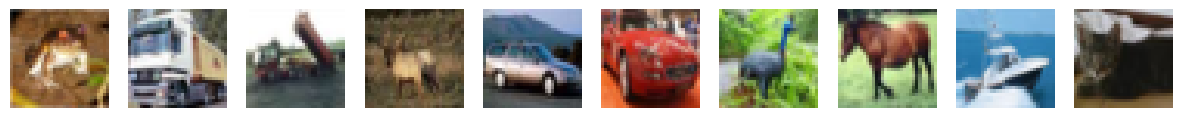

In [13]:
# Завантаження датасету
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Виведення перших 10 зображень
fig, axes = plt.subplots(1, 10, figsize=(15,15))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()

In [14]:
# Підготовка даних
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
# Побудова архітектури моделі
model = Sequential()

# Перший згортковий шар
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Другий згортковий шар
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Третій згортковий шар
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Колбеки
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)
# Навчання моделі
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.3068 - loss: 1.8492 - val_accuracy: 0.5253 - val_loss: 1.3070 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5361 - loss: 1.2976 - val_accuracy: 0.6228 - val_loss: 1.0696 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6167 - loss: 1.0891 - val_accuracy: 0.6372 - val_loss: 1.0554 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6597 - loss: 0.9732 - val_accuracy: 0.6646 - val_loss: 0.9717 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6941 - loss: 0.8793 - val_accuracy: 0.6966 - val_loss: 0.8869 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7214 - loss: 0.8038 - val_accuracy: 0.6812 - val_loss: 0.9228 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7380 - loss: 0.7585 

In [17]:
# Виведення архітектури моделі
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 681,440 (2.60 MB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 454,294 (1.73 MB)

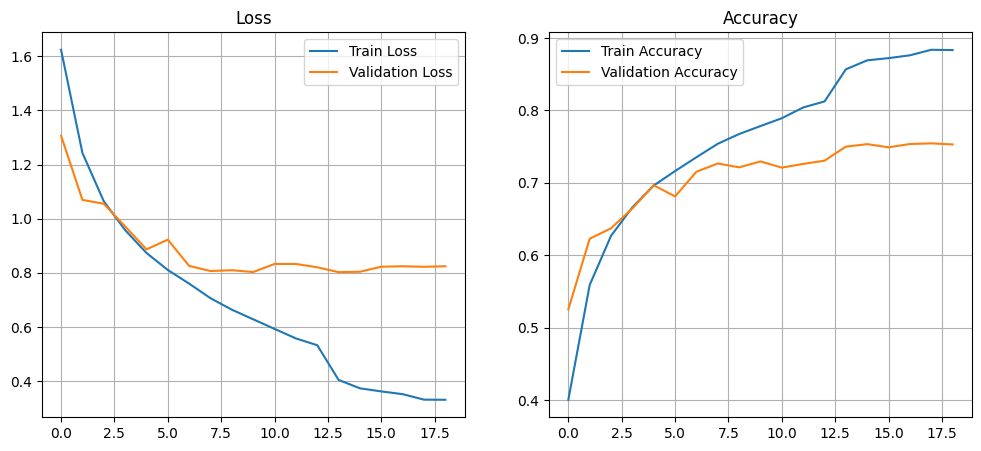

In [18]:
plt.figure(figsize=(12, 5))
# Функція втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True)
plt.title('Loss')

# Точність
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.grid(True)
plt.show()

In [19]:
# Класифікаційний звіт
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.85      0.87      0.86      1000
           2       0.63      0.66      0.64      1000
           3       0.59      0.57      0.58      1000
           4       0.71      0.70      0.71      1000
           5       0.67      0.69      0.68      1000
           6       0.80      0.79      0.80      1000
           7       0.80      0.78      0.79      1000
           8       0.86      0.85      0.85      1000
           9       0.84      0.81      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



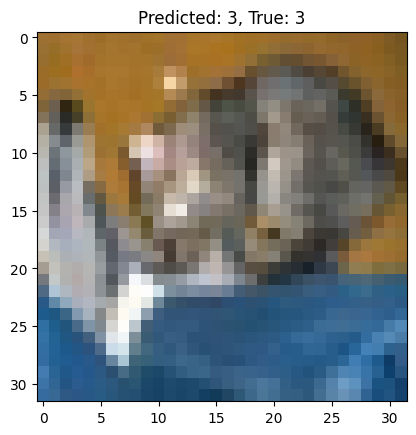

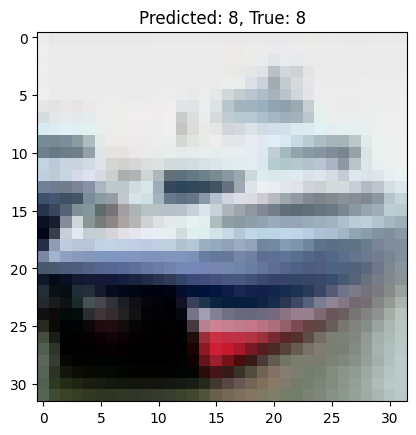

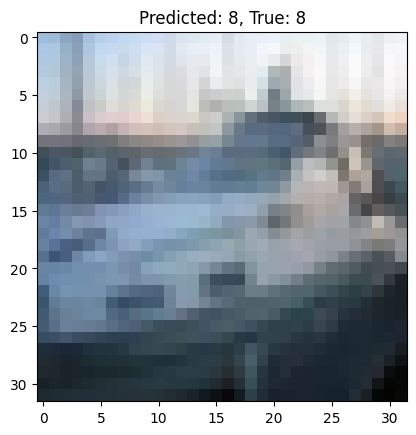

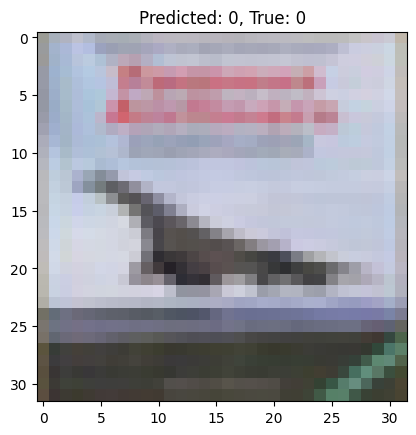

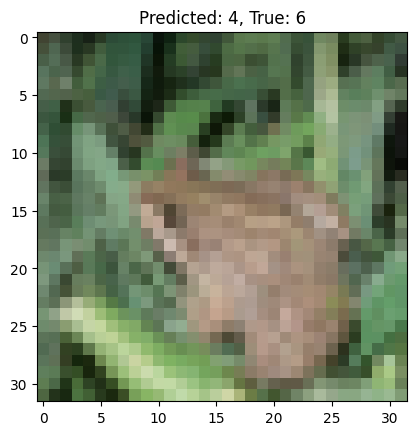

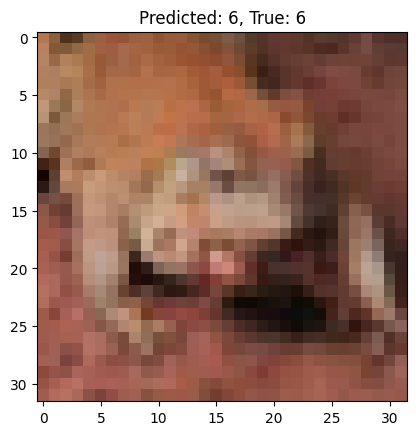

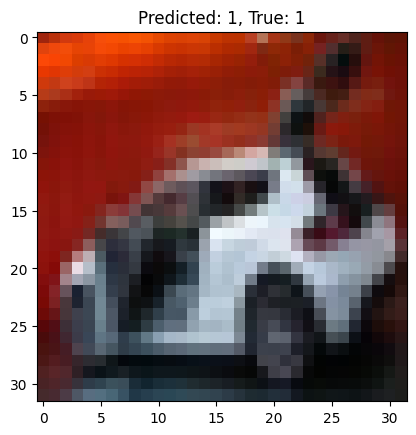

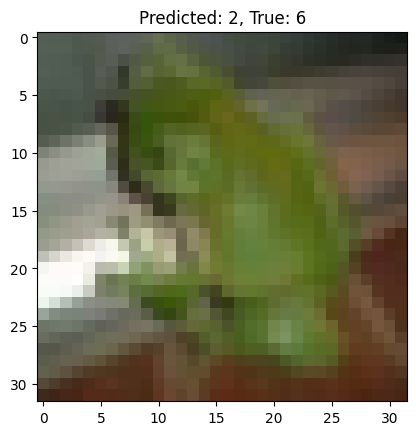

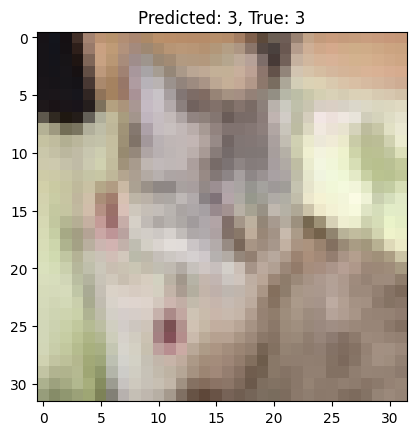

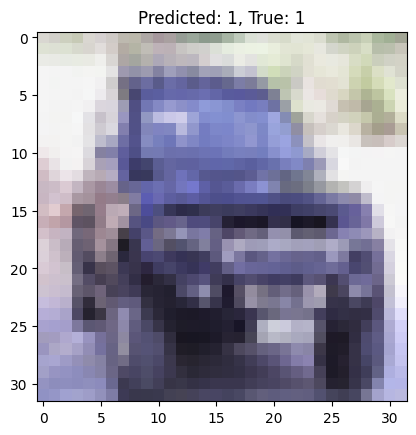

In [20]:
# Візуалізація розпізнавання
for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred[i]}, True: {y_true[i]}")
    plt.show()

In [21]:
from tensorflow.keras.applications import VGG16

# Завантаження VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [22]:
# Заморожуємо всі шари, окрім останніх декількох
for layer in vgg_model.layers[:-4]:
    layer.trainable = False

# Додаємо нові шари
model_vgg = Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція
model_vgg.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Колбеки
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Навчання моделі
history_vgg = model_vgg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.4899 - loss: 1.4518 - val_accuracy: 0.7027 - val_loss: 0.8533 - learning_rate: 1.0000e-04
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.7162 - loss: 0.8257 - val_accuracy: 0.7268 - val_loss: 0.7988 - learning_rate: 1.0000e-04
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7692 - loss: 0.6852 - val_accuracy: 0.7443 - val_loss: 0.7504 - learning_rate: 1.0000e-04
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8054 - loss: 0.5683 - val_accuracy: 0.7466 - val_loss: 0.7424 - learning_rate: 1.0000e-04
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8392 - loss: 0.4739 - val_accuracy: 0.7450 - val_loss: 0.7822 - learning_rate: 1.0000e-04
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8714 - loss: 0.3759 - val_accuracy: 0.7480 - val_loss: 0.7886 - learning_rate: 1.0000e-04
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/ste

In [24]:
# Виведення архітектури моделі VGG16
model_vgg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,275,232 (111.68 MB)

 Trainable params: 7,213,322 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 14,426,646 (55.03 MB)

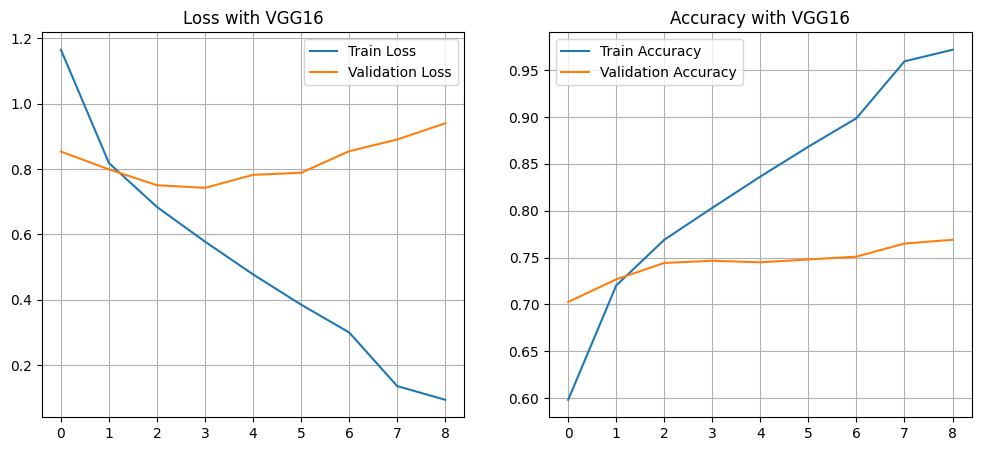

In [25]:
plt.figure(figsize=(12, 5))
# Функція втрат
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True)
plt.title('Loss with VGG16')

# Точність
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)
plt.title('Accuracy with VGG16')
plt.show()

In [26]:
# Класифікаційний звіт
y_pred_vgg = np.argmax(model_vgg.predict(X_test), axis=1)
y_true_vgg = np.argmax(y_test, axis=1)
print(classification_report(y_true_vgg, y_pred_vgg))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.86      0.84      0.85      1000
           2       0.75      0.67      0.71      1000
           3       0.50      0.66      0.57      1000
           4       0.71      0.65      0.68      1000
           5       0.64      0.66      0.65      1000
           6       0.85      0.72      0.78      1000
           7       0.75      0.83      0.79      1000
           8       0.89      0.83      0.86      1000
           9       0.81      0.80      0.80      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



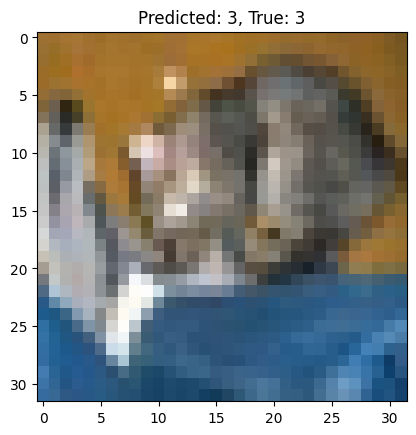

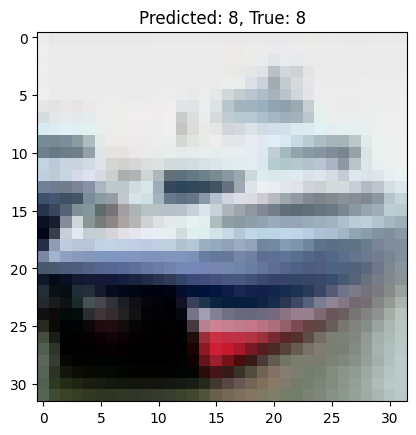

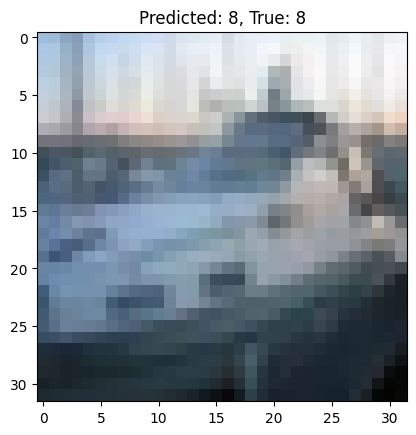

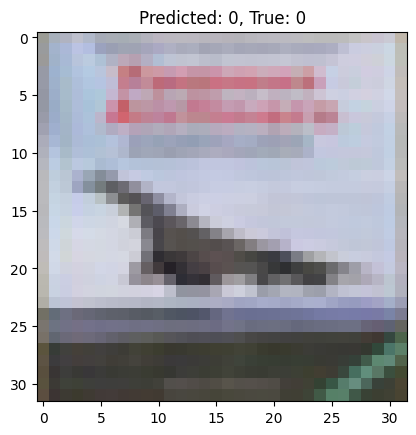

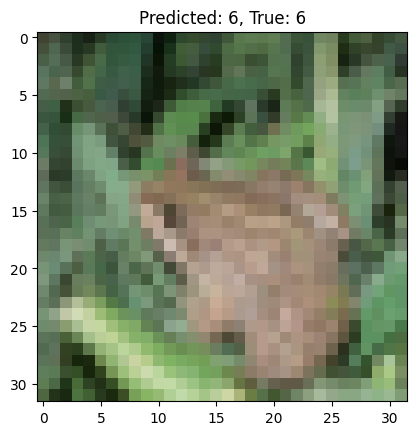

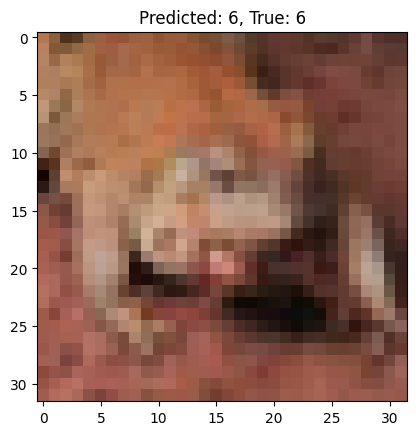

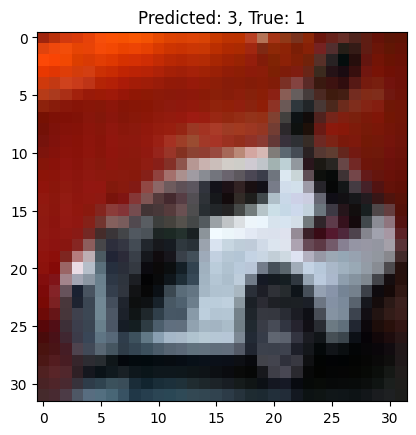

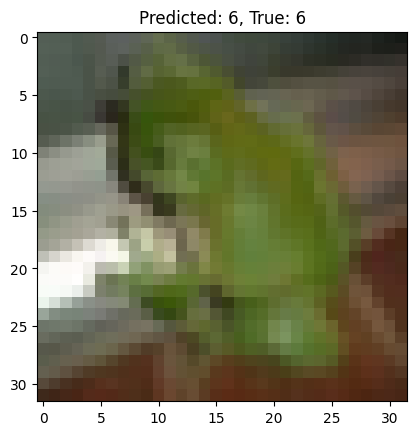

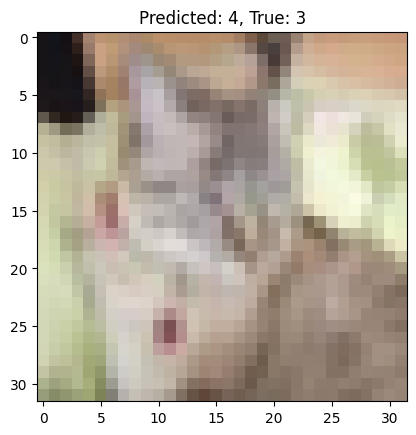

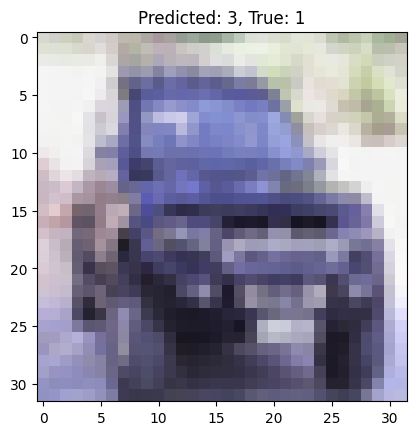

In [27]:
# Візуалізація розпізнавання
for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_vgg[i]}, True: {y_true_vgg[i]}")
    plt.show()